## Model

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import kagglehub

ModuleNotFoundError: No module named 'kagglehub'

In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is NOT AVAILABLE


In [ ]:
path = kagglehub.dataset_download("tcc3281/traffic-signs")

In [4]:
# Tham số
IMG_SIZE = (224, 224)  # Điều chỉnh theo kích thước ảnh của bạn
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 15  # Thay đổi theo số lượng class thực tế

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

TRAIN_PATH='../dataset/train'
VAL_PATH='../dataset/val/'
TEST_PATH='../dataset/test/'
NOISE_PATH='../dataset/noise_2/'
MODEL_PATH='../model/best_model_v13.keras'

In [5]:
# Tạo data generators
train_datagen = ImageDataGenerator(
    rescale=1./224,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./224)

# Tạo data loaders
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    VAL_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

noise_generator = val_test_datagen.flow_from_directory(
    NOISE_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 52500 images belonging to 15 classes.
Found 11250 images belonging to 15 classes.
Found 11250 images belonging to 15 classes.
Found 5000 images belonging to 15 classes.


In [6]:
# read Model
model=tf.keras.models.load_model(MODEL_PATH)

In [7]:
# Đánh giá trên test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Tess loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

D:\chientuhocai\Traffic_Sign\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


352/352 ━━━━━━━━━━━━━━━━━━━━ 269s 757ms/step - accuracy: 0.9833 - loss: 0.0521
Tess loss: 0.0660172626376152
Test accuracy: 0.9785777926445007


In [8]:
# Đánh giá trên noise set
noise_loss, noise_acc = model.evaluate(noise_generator)
print(f'Noise loss: {noise_loss}')
print(f'Noise accuracy: {noise_acc}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 154s 983ms/step - accuracy: 0.7931 - loss: 0.6618
Noise loss: 0.605018138885498
Noise accuracy: 0.8032000064849854


In [9]:
# train_loss, train_acc = model.evaluate(train_generator)
# print(f'Train loss: {train_loss}')
# print(f'Train accuracy: {test_acc}')

## Plot

### Confusion matrix

352/352 ━━━━━━━━━━━━━━━━━━━━ 337s 950ms/step


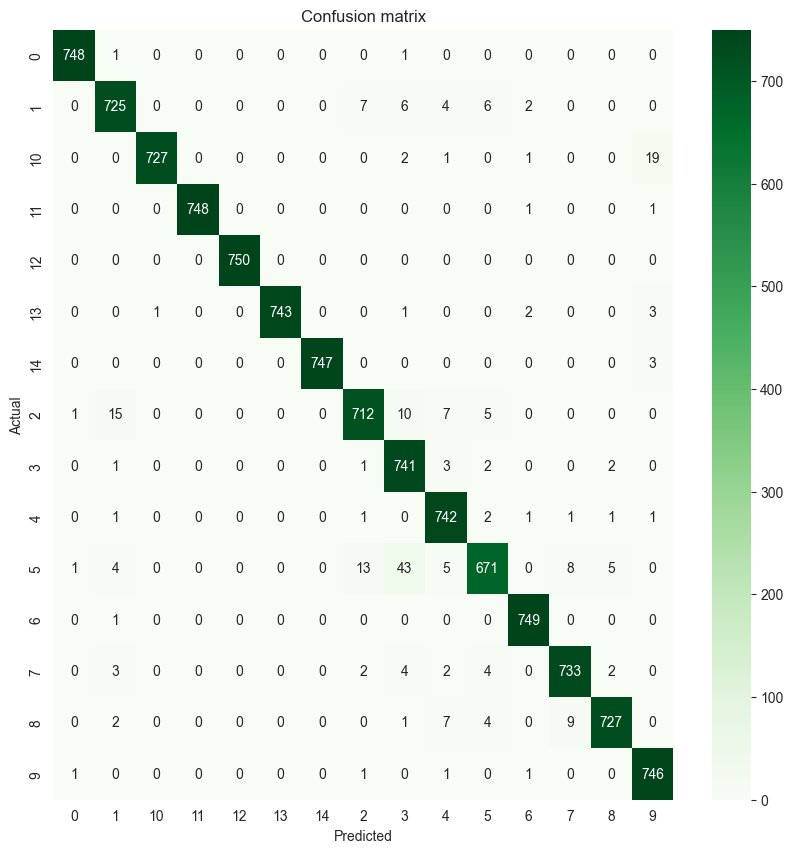

In [10]:
# Dự đoán
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Labels
labels = test_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

# Thực tế
y_test = test_generator.classes
true_labels = [labels[k] for k in y_test]

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values(), cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 869ms/step


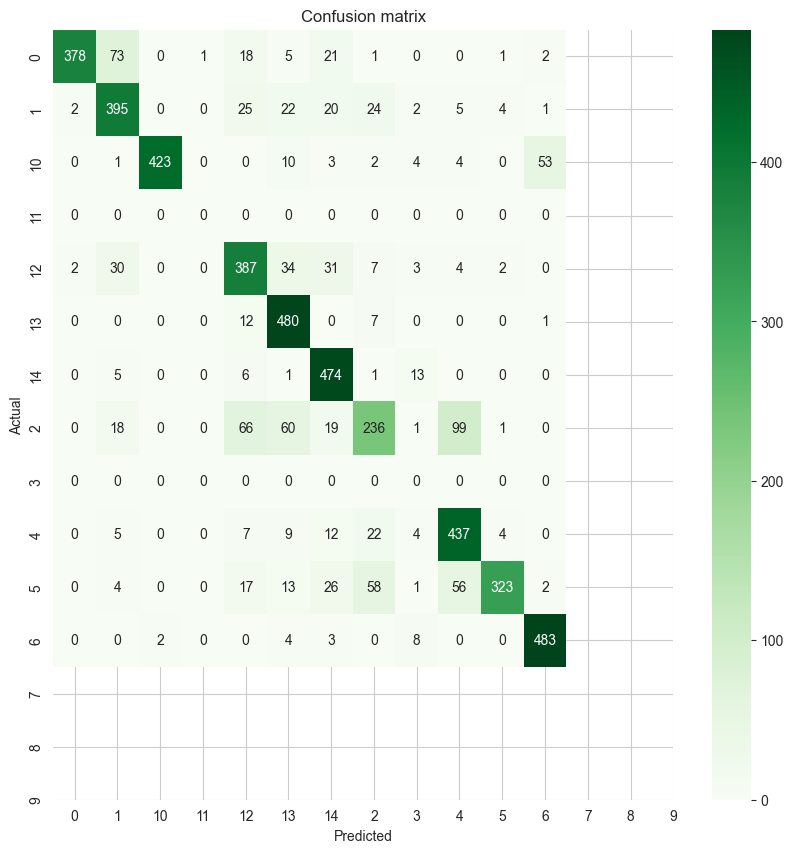

In [11]:
# Dự đoán
Y_pred = model.predict(noise_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Labels
labels = noise_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

# Thực tế
y_test = noise_generator.classes
true_labels = [labels[k] for k in y_test]

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values(), cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
# Dự đoán
# Y_pred = model.predict(train_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# 
# # Labels
# labels = train_generator.class_indices
# labels = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in y_pred]
# 
# # Thực tế
# y_test = train_generator.classes
# true_labels = [labels[k] for k in y_test]
# 
# # Confusion matrix
# cm = confusion_matrix(true_labels, predictions)
# plt.figure(figsize=(10, 10))
# sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values(), cmap='Greens')
# plt.title('Confusion matrix')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()